<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PHydro-cover-small.png">
*This is the Jupyter notebook version of the [Python in Hydrology](http://www.greenteapress.com/pythonhydro/pythonhydro.html) by Sat Kumar Tomer.*
*Source code is available at [code.google.com](https://code.google.com/archive/p/python-in-hydrology/source).*

*The book is available under the [GNU Free Documentation License](http://www.gnu.org/copyleft/fdl.html). If you have comments, corrections or suggestions, please send email to satkumartomer@gmail.com.*

<!--NAVIGATION-->
< [10. Advance Statistics](10.00-Advance-Statistics.ipynb) | [Contents](Index.ipynb) | [Multivariate Distribution](10.02-Multivariate-Distribution.ipynb)>

## 10.1 copula

Copulas用于描述两个随机变量的相关性。Copula意味着耦合两个CDF。让我们生成两个随机变量:一个具有正态分布，另一个是正态分布和均匀分布的组合。

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

# synthetic data
x = np.random.randn(1000)
y = np.random.randn(1000)

首先我们想要通过使用散点图看我们的数据是如何关联的，我们也想要查看x和y是如何分布的。我们可以在三个独立的图或使用子图(subplot)来做这个。在本例中，我们通过为三个图指定不同的坐标轴将来在一个图中尝试此操作。我们从定义三个图的坐标范围开始。对`axis`的输入是左下角的x和y，图形的宽度和高度。在下面的示例中，我们以类似的方式指定轴，以便使图正确对齐。

In [16]:
plt.clf()
axScatter = plt.axes([0.1, 0.1, 0.5, 0.5])
axHistx = plt.axes([0.1, 0.65, 0.5, 0.3])
axHisty = plt.axes([0.65, 0.1, 0.3, 0.5])

现在，我们使用这个轴来绘制图形。

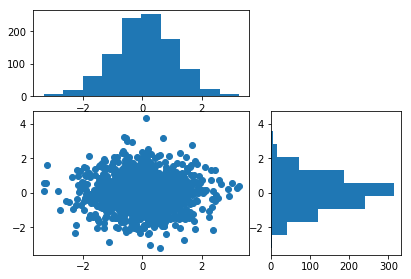

In [17]:
# the plots
axScatter.scatter(x, y)
axHistx.hist(x)
axHisty.hist(y, orientation='horizontal')

# set the limit of histogram plots
axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

<center>图10.1:散点图与边缘直方图</center>

图10.1显示了结果图。

现在让我们使用copula模拟数据集合。我已经编写了一个库，`ambhas.copula`(译者注:该库目前只支持python2.7版本)来处理copulas。这个库内有三个copula(Frank,Clayton和Gumbel)。首先我们导入库，然后初始化这个类。

In [18]:
from ambhas.copula import Copula
foo = Copula(x, y,'frank')

third:10001000


我们可以通过`tau`和`theta`属性分别得到Kendall的tau的值和Frank的参数。

In [19]:
print(foo.tau)

-0.00867667667668


In [20]:
print(foo.theta)

-0.078125


我们可以使用Frank copula生成集合。

In [21]:
x1,y1 = foo.generate_xy()

AttributeError: 'module' object has no attribute 'cpdf'


这个不是官方的statistics库，而是。。。http://bonsai.hgc.jp/~mdehoon/software/python/Statistics/

http://bonsai.hgc.jp/~mdehoon/software/python/
http://bonsai.hgc.jp/~mdehoon/software/python/

现在，我们可以用原始数据绘制模拟数据。

In [ ]:
plt.scatter(x1,y1,color='g')
plt.scatter(x,y,color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()